# Matplotlib: Histograms and Bar Charts

### Histograms

Histograms are a very useful tool for exploring your data, particularly for understanding the distribution of specific variables. To construct a histogram, the first step is to "bin" the range of value, or divide the entire range of values into a series of interval and then count how many values fall into each interval. 

Let's see how it all works with an example using the `plt.hist` function. 

[101.57273396  91.73254302  84.05365793 ...  91.6805221  121.97322188
 108.67721256]


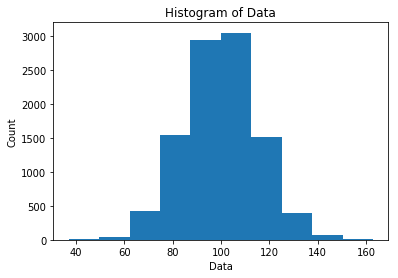

In [1]:
# importing our packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create a random set of data
mu = 100 # mean of our data
sigma = 15 # standard deviation of our data
data = mu + sigma*np.random.randn(10000) # get a random distribution of numbers in our range

print(data)

plt.hist(data)
plt.xlabel("Data")
plt.ylabel("Count")
plt.title("Histogram of Data")

plt.show()

Here we see a roughly bell-shaped disitribution, which we refer to in statistics as a normal distribution. We see the peak of the distribution is at the value 100, which corresponds to our mean parameter `mu`, and most (~70%) of the data lies within +/- 15 of the mean, corresponding to our standard deviation parameter `sigma`. 

In this plot we can see that our data is split into 10 bins spanning about 15 values per bin, as evidenced by the 10 bars. 10 bins is the default value. To get a better sense of the distribution, we can use a larger number of more fine-grained bins.  

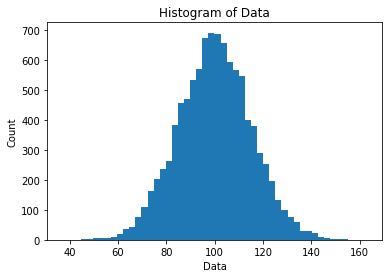

In [2]:
# plot histogram and add labels/title with 50 bins
plt.hist(data, bins=50)
plt.xlabel("Data")
plt.ylabel("Count")
plt.title("Histogram of Data")
plt.show()

Using 50 bins instead of 10 gives a clearer bell-shaped normal distribution.

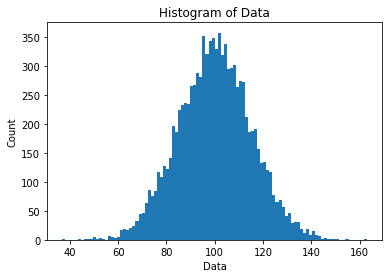

In [3]:
# plot histogram and add labels/title with 100 bins
plt.hist(data, bins=100)
plt.xlabel("Data")
plt.ylabel("Count")
plt.title("Histogram of Data")
plt.show()

However, using bins that are too fine-grained might take away from the overall shape of the distribution. 

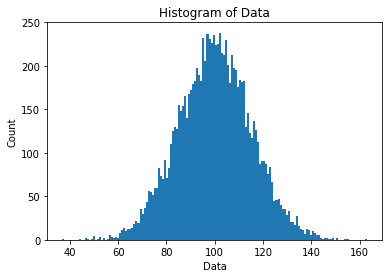

In [4]:
# plot histogram and add labels/title with 150 bins
plt.hist(data, bins=150)
plt.xlabel("Data")
plt.ylabel("Count")
plt.title("Histogram of Data")
plt.show()

You'll notice that the y-axis on all of our histogram plots shows the count of the values of `data` that falls into each bin. As we increase the number of bins and decrease the bin size, the range of the y-axis also decreases - smaller bins means fewer values fall in each bin. This can make comparing between histograms of different variables difficult. 

One solution to this issue is to convert the y-axis to show the *percentage* of values that fall in each bin rather than raw counts. This is called a **density plot**. 

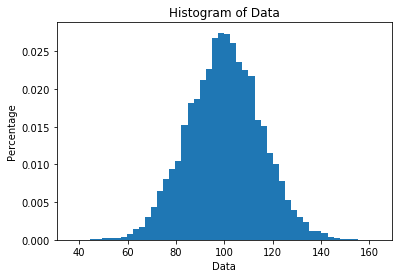

In [5]:
# plot density and add labels/title with 50 bins
plt.hist(data, bins=50, density = True)
plt.xlabel("Data")
plt.ylabel("Percentage")
plt.title("Histogram of Data")
plt.show()

### Bar Charts

Bar charts are useful for comparing a variable across several groups. In a bar chart, the x-axis is usually a *discrete* variable, such as different groups in a study or specific categories of things, and the y-axis is usually a *continuous* variable, such as height or age.

Let's practice with a really simple example of the `plt.bar` function.

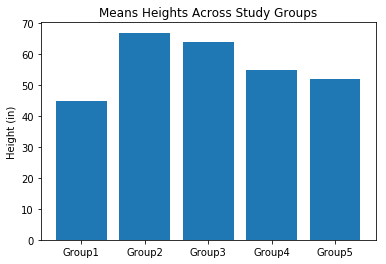

In [6]:
# create data vector and labels vector
means = (45, 67, 64, 55, 52)
groups = ('Group1', 'Group2', 'Group3', 'Group4', 'Group5')

# get indexes for xticks
idxs = np.arange(len(means))

# plot bar graph and add labels/title
plt.bar(idxs, means)
plt.ylabel("Height (in)")
plt.xticks(idxs, groups)
plt.title ('Means Heights Across Study Groups')
plt.show()

Sometimes we want to compare multiple variables - such as ages of men and women across our 5 study groups. One way we can do this is using the `subplots` function, which enables us to put two plots side by side. 

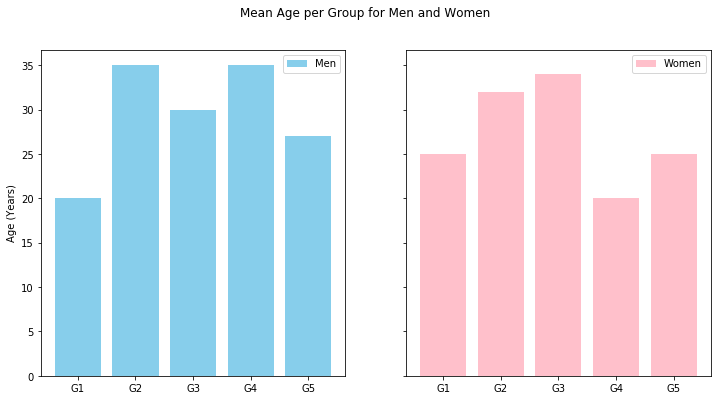

In [7]:
# age means for men and women across groups
men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)

# subplots, 1 row, 2 columns
fig, ax = plt.subplots(1, 2,  figsize = (12,6), sharey=True)

# fig: full plot object
# ax: array containing each subplot
# we identify each individual plot by its index (i.e. ax[0] for the first)
ax[0].bar(idxs, men_means, color='SkyBlue', label='Men')
ax[1].bar(idxs, women_means, color='Pink', label='Women')

# add the y-label plot
ax[0].set_ylabel("Age (Years)")
# add xticks and labels to the first plot
ax[0].set_xticks(idxs)
ax[0].set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
# add xticks and labels to the first plot
ax[1].set_xticks(idxs)
ax[1].set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
# add legend to both plots
ax[0].legend()
ax[1].legend()
# add suptitle to fig
fig.suptitle("Mean Age per Group for Men and Women")
fig.show()

However, this layout makes it difficult to directly compare the means of men and women in each group. A better way to visualize this data would be by plotting the bars side by side on a single graph. 

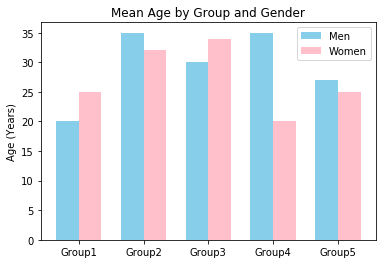

In [8]:
# defining the width of our bars. We'll see why this is important in a second.
width = 0.35

# plot mens bars on left side of the x-tick
plt.bar(idxs-width/2, men_means, width, color = 'SkyBlue', label = 'Men')
# plot womens bars on the right side of the x-tick
plt.bar(idxs+width/2, women_means, width, color = 'Pink', label = 'Women')

plt.ylabel('Age (Years)')
plt.title('Mean Age by Group and Gender')
plt.xticks(idxs,('Group1', 'Group2', 'Group3', 'Group4', 'Group5'))
plt.legend()
plt.show()

As we've seen in the histogram exercise, the mean is not the only defining feature of a disitribution - we often also look at the standard deviation to know how spread the disitribution is about the mean. This can also help us statisically determine if two groups are significantly different - if the mean +/- the standard deviation of two groups overlap they are less likely to be significantly different. 

We can add error bars to the above graph to help make this visual comparison easier. 

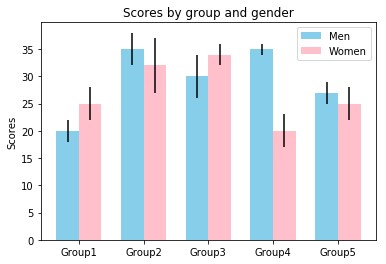

In [9]:
men_std = (2, 3, 4, 1, 2)
women_std = (3, 5, 2, 3, 3)

plt.bar(idxs - width/2, men_means, width, yerr=men_std,
                color='SkyBlue', label='Men')
plt.bar(idxs + width/2, women_means, width, yerr=women_std,
                color='Pink', label='Women')

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(idxs)
plt.xticks(idxs,('Group1', 'Group2', 'Group3', 'Group4', 'Group5'))
plt.legend()
plt.show()